# KNN classifier

In [87]:
import pandas as pd

df = pd.read_csv('dataset-modified.csv', index_col=0)
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
validation_df = pd.read_csv('validation.csv', index_col=0)

## Split the features and the target column and normalize the data

In [88]:
# full dataset
X = df.drop('Class', axis=1)
y = df['Class']

# splits
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_validation = validation_df.drop('Class', axis=1)
y_validation = validation_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

## Experiment with parameters (find optimal k)

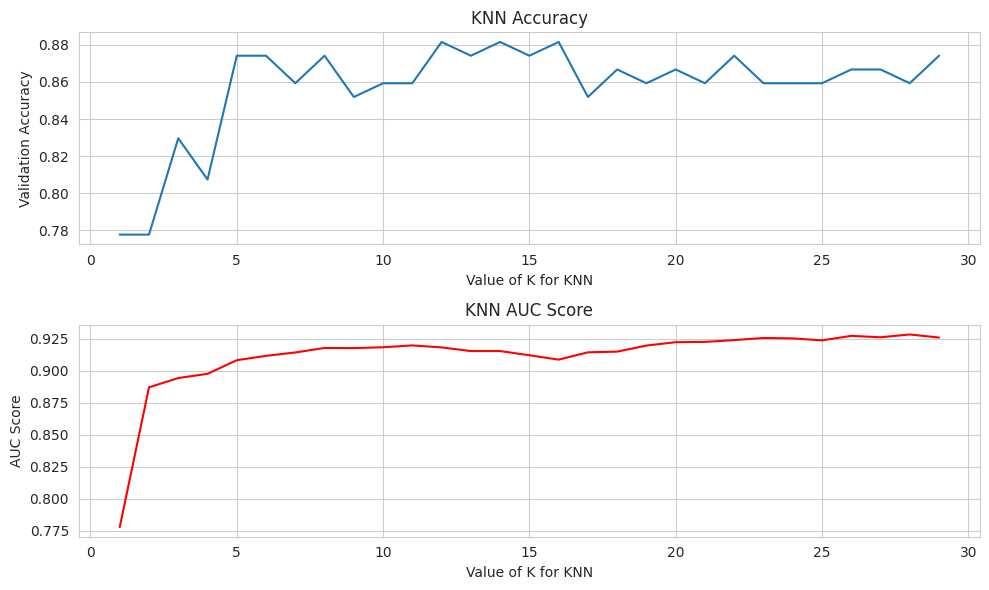

In [89]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

validation_scores = []
auc_scores = []

k_values = range(1, 30)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    y_pred = knn.predict(X_validation)
    y_pred_prob = knn.predict_proba(X_validation)[:, 1]

    accuracy = accuracy_score(y_validation, y_pred)
    auc = roc_auc_score(y_validation, y_pred_prob)

    validation_scores.append(accuracy)
    auc_scores.append(auc)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(k_values, validation_scores, label='Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Accuracy')
plt.title('KNN Accuracy')

plt.subplot(2, 1, 2)
plt.plot(k_values, auc_scores, label='AUC', color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('AUC Score')
plt.title('KNN AUC Score')

plt.tight_layout()
plt.show()

In [90]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


def get_result_stats(clf, X, y, pos_label="Kecimen"):
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)[:, 1]

    conf_matrix = confusion_matrix(y, y_pred, labels=["Kecimen", "Besni"])
    acc = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_prob)
    precision = precision_score(y, y_pred, pos_label=pos_label)
    recall = recall_score(y, y_pred, pos_label=pos_label)
    f1 = f1_score(y, y_pred, pos_label=pos_label)

    return y_pred, acc, auc_score, precision, recall, f1, conf_matrix


dtype = {"K": int, "Accuracy": float, "AUC": float, "Precision": float, "Recall": float, "F1 Score": float}
results_df = pd.DataFrame(columns=["K", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"]).astype(dtype)
wrong_predictions = set()
for val in [2, 12, 27]:
    clf = KNeighborsClassifier(n_neighbors=val).fit(X_train, y_train)
    y_pred, acc, auc_score, precision, recall, f1, conf_matrix = get_result_stats(clf, X_test, y_test)

    df_conf_matrix = pd.DataFrame(conf_matrix, index=["Actual Kecimen", "Actual Besni"],
                                  columns=["Predicted Kecimen", "Predicted Besni"])
    display(df_conf_matrix)

    temp_df = pd.DataFrame([[val, acc, auc_score, precision, recall, f1]],
                           columns=["K", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"]).astype(dtype)
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

    for i, (actual, predicted) in enumerate(zip(y_test, y_pred)):
        if actual != predicted:
            wrong_predictions.add(i)

results_df.to_latex(
    f"./knn-scores.tex",
    float_format="%.3f",
    caption=f"Apskaičiuoti matai",
    label=f"tab:knn-scores",
    escape=True,
    bold_rows=True,
)

display(results_df)


,Predicted Kecimen,Predicted Besni
Actual Kecimen,41,31
Actual Besni,7,56


,Predicted Kecimen,Predicted Besni
Actual Kecimen,56,16
Actual Besni,9,54


,Predicted Kecimen,Predicted Besni
Actual Kecimen,60,12
Actual Besni,9,54


,K,Accuracy,AUC,Precision,Recall,F1 Score
0,2,0.718519,0.834877,0.854167,0.569444,0.683333
1,12,0.814815,0.876874,0.861538,0.777778,0.817518
2,27,0.844444,0.910825,0.869565,0.833333,0.851064


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

# TODO: 8. Fiksuoti optimalius pasirinkto klasifikatoriaus parametrus
display(get_result_stats(knn, X_test, y_test))


(array(['Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
        'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
        'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
        'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
        'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
        'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
        'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
        'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
        'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
        'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
        'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
        'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
        'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
        'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
     

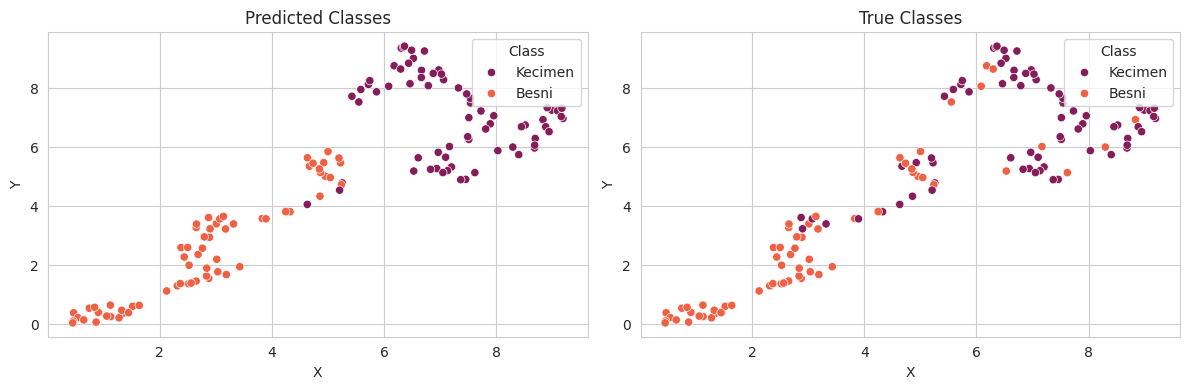

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap

umap_reducer = umap.UMAP(n_neighbors=20, random_state=42, n_jobs=1)
X_test_umap = umap_reducer.fit_transform(X_test)

df_pred = pd.DataFrame(data={'UMAP1': X_test_umap[:, 0], 'UMAP2': X_test_umap[:, 1], 'Class': y_pred})
df_true = pd.DataFrame(data={'UMAP1': X_test_umap[:, 0], 'UMAP2': X_test_umap[:, 1], 'Class': y_test})

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df_pred, x='UMAP1', y='UMAP2', hue='Class', palette="rocket", ax=ax0)
ax0.set_title('Predicted Classes')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.legend(title='Class')

sns.scatterplot(data=df_true, x='UMAP1', y='UMAP2', hue='Class', palette="rocket", ax=ax1)
ax1.set_title('True Classes')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend(title='Class')

plt.tight_layout()
plt.show()

In [93]:
def display_stats_tables_by_class(df: pd.DataFrame, label: str):
    rename_map = {
        "mean": "Mean",
        "std": "Std",
        "min": "Min",
        "50%": "Med",
        "25%": "1Q",
        "75%": "3Q",
        "max": "Max",
        "count": "Count"
    }

    for cn in ["Kecimen", "Besni"]:
        stat_df = (
            df.loc[df["Class"] == cn].describe().T.rename(columns=rename_map).T
        )

        stat_df.to_latex(
            f"./stat-{cn.lower()}-knn.tex",
            float_format="%.3f",
            caption=f"Klasės {cn} aprašomoji statistika",
            label=f"tab:knn-{label}-{cn.lower()}",
            escape=True,
            bold_rows=True,
        )

        print(f"Klasės {cn} aprašomoji statistika")
        display(stat_df)


display_stats_tables_by_class(df=test_df.loc[list(wrong_predictions)], label="stat-wrong")


KeyError: '[0, 1, 130, 132, 8, 9, 11, 19, 20, 22, 26, 30, 31, 33, 41, 43, 49, 53, 56, 63, 64, 66, 72, 74, 79, 80, 82, 85, 93, 95, 101, 102, 107, 108, 110, 112, 115, 116, 124] not in index'